In [2]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


In [4]:
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\GuptaSau\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to
[

True

In [3]:

from tensorflow.keras import utils
utils.to_categorical
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from keras.regularizers import l2


In [7]:
# Dataset loading and replacing space() issue from the column "Potential Suicide post"
df=pd.read_csv('C:/Users/GuptaSau/Downloads/Suicide_Ideation_Dataset(Twitter-based).csv', engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')
df['Suicide'].value_counts()
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  
0           Not Suicide post  
1           Not Suicide post  
2     Potential Suicide post  
3           Not Suicide post  
4           Not Suicide post  
...                      ...  
1782        Not Suicide post  
1783        Not Suicide post  
1784        Not Suicide post  
1785        Not Suicide post  
1786        Not Suicide post  

[1787 rows x 2 columns]

In [8]:
df['Tweet']=df['Tweet'].fillna("")

In [9]:
# Lower case conversion
df['lower_case']= df['Tweet'].apply(lambda x: x.lower())

In [10]:
# Tokenization process
tokenizer = RegexpTokenizer(r'\w+')
df['special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  \
0           Not Suicide post   
1           Not Suicide post   
2     Potential Suicide post   
3           Not Suicide post   
4           Not Suicide post   
...                      ...   
1782        Not Suicide post   
1783        Not Suicide post   
1784        Not Suicide post   
1785        Not Suicide post   
1786        Not Suicide post   

                                             lower_case  \
0                                     making some lunch   
1                           @alexia you want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets hey jer! since when did y...   
4     trying out &quot;delicious library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my nokia n95-1   
1783  starting my day out with a positive attitude! ...   
1784  @belledame222 hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;i friggin love you!!!&quo...   

                                           special_word  
0                                 [making, some, lunch]  
1                       [alexia, you, want, his, money]  
2     [dizzyhrvy, that, crap, took, me, forever, to,...  
3     [jnaylor, kiwitweets, hey, jer, since, when, d...  
4     [trying, out, quot, delicious, library, 2, quo...  
...                                                 ...  
1782  [i, have, forgotten, how, much, i, love, my, n...  
1783  [starting, my, day, out, with, a, positive, at...  
1784  [belledame222, hey, it, s, 5, am, give, a, gir...  
1785  [2, drunken, besties, stumble, into, my, room,...  
1786  [dancingbonita, quot, i, friggin, love, you, q...  

[1787 rows x 4 columns]

In [11]:
# Stopwords Removal
stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]
df['stop_words'] = df['special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  \
0           Not Suicide post   
1           Not Suicide post   
2     Potential Suicide post   
3           Not Suicide post   
4           Not Suicide post   
...                      ...   
1782        Not Suicide post   
1783        Not Suicide post   
1784        Not Suicide post   
1785        Not Suicide post   
1786        Not Suicide post   

                                             lower_case  \
0                                     making some lunch   
1                           @alexia you want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets hey jer! since when did y...   
4     trying out &quot;delicious library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my nokia n95-1   
1783  starting my day out with a positive attitude! ...   
1784  @belledame222 hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;i friggin love you!!!&quo...   

                                           special_word  \
0                                 [making, some, lunch]   
1                       [alexia, you, want, his, money]   
2     [dizzyhrvy, that, crap, took, me, forever, to,...   
3     [jnaylor, kiwitweets, hey, jer, since, when, d...   
4     [trying, out, quot, delicious, library, 2, quo...   
...                                                 ...   
1782  [i, have, forgotten, how, much, i, love, my, n...   
1783  [starting, my, day, out, with, a, positive, at...   
1784  [belledame222, hey, it, s, 5, am, give, a, gir...   
1785  [2, drunken, besties, stumble, into, my, room,...   
1786  [dancingbonita, quot, i, friggin, love, you, q...   

                                             stop_words  
0                           ['making', 'some', 'lunch']  
1                    ['alexia', 'you', 'want', 'money']  
2     ['dizzyhrvy', 'crap', 'took', 'forever', 'put'...  
3     ['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...  
4     ['trying', 'quot', 'delicious', 'library', '2'...  
...                                                 ...  
1782  ['forgotten', 'much', 'love', 'my', 'nokia', '...  
1783  ['starting', 'my', 'day', 'positive', 'attitud...  
1784  ['belledame222', 'hey', '5', 'give', 'girl', '...  
1785  ['2', 'drunken', 'besties', 'stumble', 'my', '...  
1786  ['dancingbonita', 'quot', 'friggin', 'love', '...  

[1787 rows x 5 columns]

In [12]:
# Word filtering with word length of less or equal to 2
df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ')
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  \
0           Not Suicide post   
1           Not Suicide post   
2     Potential Suicide post   
3           Not Suicide post   
4           Not Suicide post   
...                      ...   
1782        Not Suicide post   
1783        Not Suicide post   
1784        Not Suicide post   
1785        Not Suicide post   
1786        Not Suicide post   

                                             lower_case  \
0                                     making some lunch   
1                           @alexia you want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets hey jer! since when did y...   
4     trying out &quot;delicious library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my nokia n95-1   
1783  starting my day out with a positive attitude! ...   
1784  @belledame222 hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;i friggin love you!!!&quo...   

                                           special_word  \
0                                 [making, some, lunch]   
1                       [alexia, you, want, his, money]   
2     [dizzyhrvy, that, crap, took, me, forever, to,...   
3     [jnaylor, kiwitweets, hey, jer, since, when, d...   
4     [trying, out, quot, delicious, library, 2, quo...   
...                                                 ...   
1782  [i, have, forgotten, how, much, i, love, my, n...   
1783  [starting, my, day, out, with, a, positive, at...   
1784  [belledame222, hey, it, s, 5, am, give, a, gir...   
1785  [2, drunken, besties, stumble, into, my, room,...   
1786  [dancingbonita, quot, i, friggin, love, you, q...   

                                             stop_words  \
0                           ['making', 'some', 'lunch']   
1                    ['alexia', 'you', 'want', 'money']   
2     ['dizzyhrvy', 'crap', 'took', 'forever', 'put'...   
3     ['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...   
4     ['trying', 'quot', 'delicious', 'library', '2'...   
...                                                 ...   
1782  ['forgotten', 'much', 'love', 'my', 'nokia', '...   
1783  ['starting', 'my', 'day', 'positive', 'attitud...   
1784  ['belledame222', 'hey', '5', 'give', 'girl', '...   
1785  ['2', 'drunken', 'besties', 'stumble', 'my', '...   
1786  ['dancingbonita', 'quot', 'friggin', 'love', '...   

                                             short_word  \
0                                 [making, some, lunch]   
1                            [alexia, you, want, money]   
2     [dizzyhrvy, crap, took, forever, put, together...   
3     [jnaylor, kiwitweets, hey, jer, since, did, yo...   
4     [trying, quot, delicious, library, quot, mixed...   
...                                                 ...   
1782            [forgotten, much, love, my, nokia, n95]   
1783  [starting, my, day, positive, attitude, great,...   
1784  [belledame222, hey, give, girl, some, credit, ...   
1785  [drunken, besties, stumble, my, room, run, aro...   
1786  [dancingbonita, quot, friggin, love, you, quot...   

                                                 string  
0                                     making some lunch  
1   

In [13]:
# Non-english words (mention,emoji,link,special characters etc..) removal
words = set(nltk.corpus.words.words())
for w in reuters.words():
  words.add(w)
for w in brown.words():
  words.add(w)
for w in gutenberg.words():
  words.add(w)
df['nonEnglish'] = df['string'].apply(lambda x: " ".join(x for x in x.split() if x in words))
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  \
0           Not Suicide post   
1           Not Suicide post   
2     Potential Suicide post   
3           Not Suicide post   
4           Not Suicide post   
...                      ...   
1782        Not Suicide post   
1783        Not Suicide post   
1784        Not Suicide post   
1785        Not Suicide post   
1786        Not Suicide post   

                                             lower_case  \
0                                     making some lunch   
1                           @alexia you want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets hey jer! since when did y...   
4     trying out &quot;delicious library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my nokia n95-1   
1783  starting my day out with a positive attitude! ...   
1784  @belledame222 hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;i friggin love you!!!&quo...   

                                           special_word  \
0                                 [making, some, lunch]   
1                       [alexia, you, want, his, money]   
2     [dizzyhrvy, that, crap, took, me, forever, to,...   
3     [jnaylor, kiwitweets, hey, jer, since, when, d...   
4     [trying, out, quot, delicious, library, 2, quo...   
...                                                 ...   
1782  [i, have, forgotten, how, much, i, love, my, n...   
1783  [starting, my, day, out, with, a, positive, at...   
1784  [belledame222, hey, it, s, 5, am, give, a, gir...   
1785  [2, drunken, besties, stumble, into, my, room,...   
1786  [dancingbonita, quot, i, friggin, love, you, q...   

                                             stop_words  \
0                           ['making', 'some', 'lunch']   
1                    ['alexia', 'you', 'want', 'money']   
2     ['dizzyhrvy', 'crap', 'took', 'forever', 'put'...   
3     ['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...   
4     ['trying', 'quot', 'delicious', 'library', '2'...   
...                                                 ...   
1782  ['forgotten', 'much', 'love', 'my', 'nokia', '...   
1783  ['starting', 'my', 'day', 'positive', 'attitud...   
1784  ['belledame222', 'hey', '5', 'give', 'girl', '...   
1785  ['2', 'drunken', 'besties', 'stumble', 'my', '...   
1786  ['dancingbonita', 'quot', 'friggin', 'love', '...   

                                             short_word  \
0                                 [making, some, lunch]   
1                            [alexia, you, want, money]   
2     [dizzyhrvy, crap, took, forever, put, together...   
3     [jnaylor, kiwitweets, hey, jer, since, did, yo...   
4     [trying, quot, delicious, library, quot, mixed...   
...                                                 ...   
1782            [forgotten, much, love, my, nokia, n95]   
1783  [starting, my, day, positive, attitude, great,...   
1784  [belledame222, hey, give, girl, some, credit, ...   
1785  [drunken, besties, stumble, my, room, run, aro...   
1786  [dancingbonita, quot, friggin, love, you, quot...   

                                                 string  \
0                                     making some lunch   
1 

In [14]:
#Lemmatization
df['new_tweets'] = df['nonEnglish'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

Tweet  \
0                                     making some lunch   
1                           @Alexia You want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets Hey Jer! Since when did y...   
4     Trying out &quot;Delicious Library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my Nokia N95-1   
1783  Starting my day out with a positive attitude! ...   
1784  @belledame222 Hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;I friggin love you!!!&quo...   

                     Suicide  \
0           Not Suicide post   
1           Not Suicide post   
2     Potential Suicide post   
3           Not Suicide post   
4           Not Suicide post   
...                      ...   
1782        Not Suicide post   
1783        Not Suicide post   
1784        Not Suicide post   
1785        Not Suicide post   
1786        Not Suicide post   

                                             lower_case  \
0                                     making some lunch   
1                           @alexia you want his money.   
2     @dizzyhrvy that crap took me forever to put to...   
3     @jnaylor #kiwitweets hey jer! since when did y...   
4     trying out &quot;delicious library 2&quot; wit...   
...                                                 ...   
1782    i have forgotten how much i love my nokia n95-1   
1783  starting my day out with a positive attitude! ...   
1784  @belledame222 hey, it's 5 am...give a girl som...   
1785  2 drunken besties stumble into my room and we ...   
1786  @dancingbonita &quot;i friggin love you!!!&quo...   

                                           special_word  \
0                                 [making, some, lunch]   
1                       [alexia, you, want, his, money]   
2     [dizzyhrvy, that, crap, took, me, forever, to,...   
3     [jnaylor, kiwitweets, hey, jer, since, when, d...   
4     [trying, out, quot, delicious, library, 2, quo...   
...                                                 ...   
1782  [i, have, forgotten, how, much, i, love, my, n...   
1783  [starting, my, day, out, with, a, positive, at...   
1784  [belledame222, hey, it, s, 5, am, give, a, gir...   
1785  [2, drunken, besties, stumble, into, my, room,...   
1786  [dancingbonita, quot, i, friggin, love, you, q...   

                                             stop_words  \
0                           ['making', 'some', 'lunch']   
1                    ['alexia', 'you', 'want', 'money']   
2     ['dizzyhrvy', 'crap', 'took', 'forever', 'put'...   
3     ['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...   
4     ['trying', 'quot', 'delicious', 'library', '2'...   
...                                                 ...   
1782  ['forgotten', 'much', 'love', 'my', 'nokia', '...   
1783  ['starting', 'my', 'day', 'positive', 'attitud...   
1784  ['belledame222', 'hey', '5', 'give', 'girl', '...   
1785  ['2', 'drunken', 'besties', 'stumble', 'my', '...   
1786  ['dancingbonita', 'quot', 'friggin', 'love', '...   

                                             short_word  \
0                                 [making, some, lunch]   
1                            [alexia, you, want, money]   
2     [dizzyhrvy, crap, took, forever, put, together...   
3     [jnaylor, kiwitweets, hey, jer, since, did, yo...   
4     [trying, quot, delicious, library, quot, mixed...   
...                                                 ...   
1782            [forgotten, much, love, my, nokia, n95]   
1783  [starting, my, day, positive, attitude, great,...   
1784  [belledame222, hey, give, girl, some, credit, ...   
1785  [drunken, besties, stumble, my, room, run, aro...   
1786  [dancingbonita, quot, friggin, love, you, quot...   

                                                 string  \
0                                     making some lunch   
1 

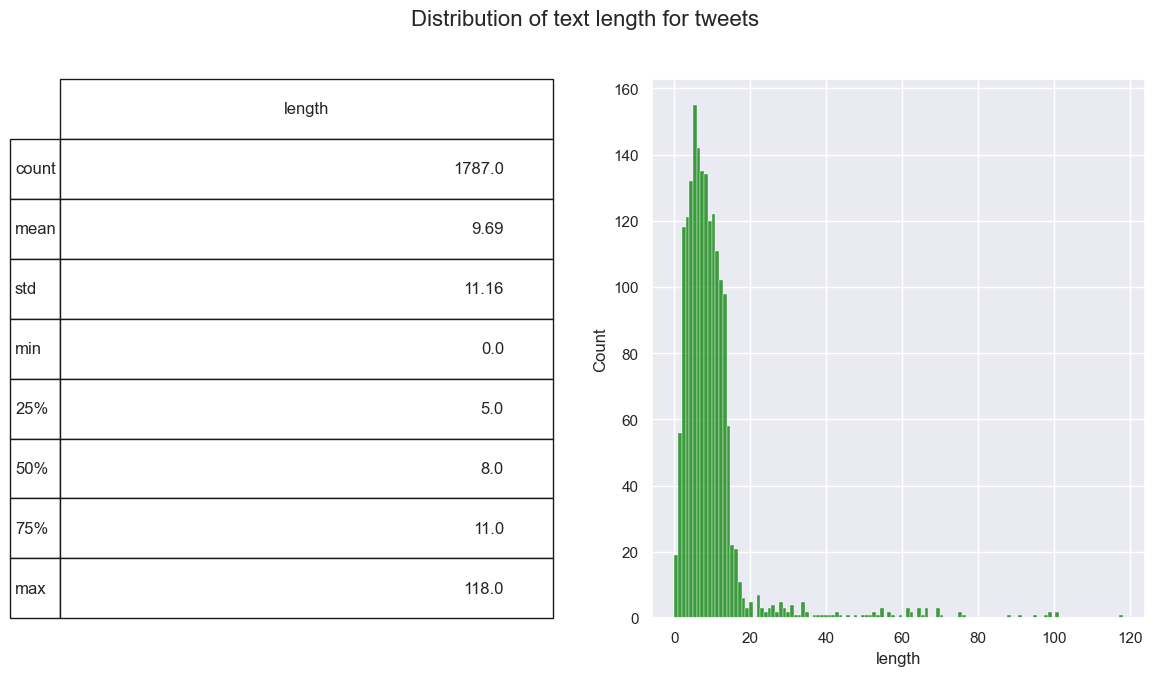

In [15]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.new_tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 12
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for tweets', fontsize=16)

plt.show()

<Axes: xlabel='Suicide', ylabel='count'>

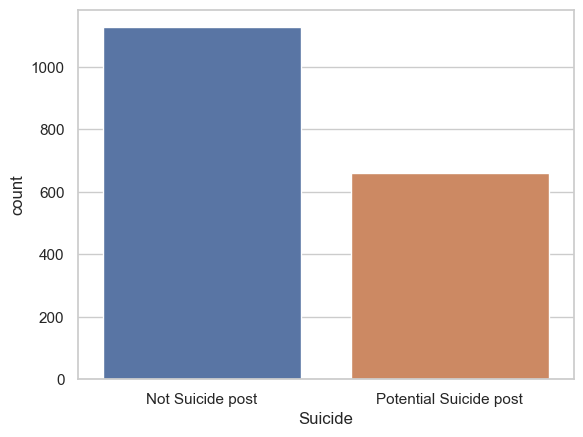

In [16]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Suicide"])

In [17]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon words in selected text', orientation='h', width=700, height=700,color='Common_words')
fig.show()
Positive = df[df['Suicide']=='Not Suicide post']
Suicidal = df[df['Suicide']=='Potential Suicide post']
top = Counter([item for sublist in Positive['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most commmon words in positive posts', orientation='h', width=700, height=700,color='Common_words')
fig.show()
top = Counter([item for sublist in Suicidal['short_word'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most commmon words in suicidal posts', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

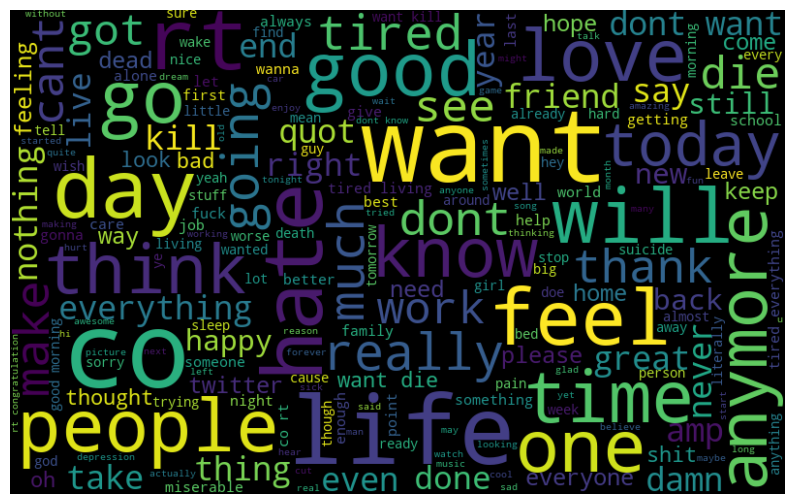

In [18]:
normal_words =' '.join([text for text in df['new_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

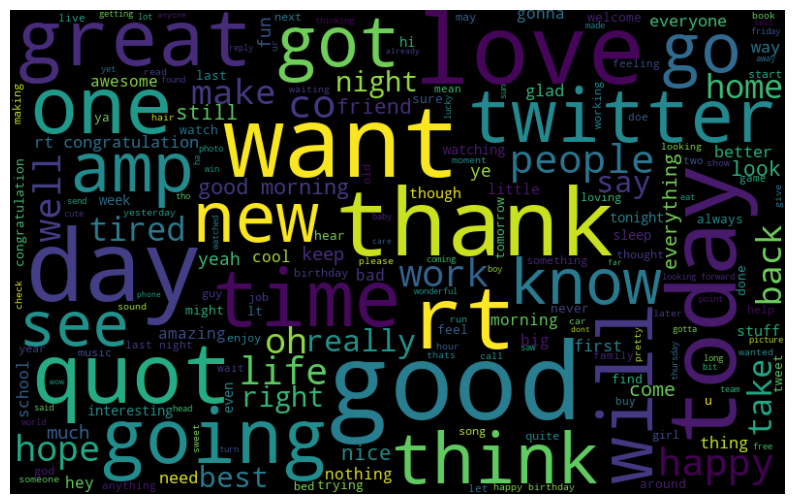

In [19]:
positive_words =' '.join([text for text in df['new_tweets'][df['Suicide'] == 'Not Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

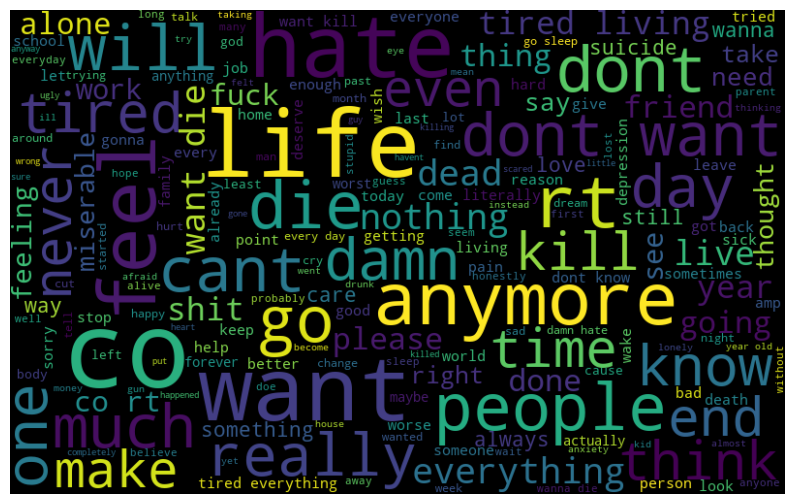

In [20]:
negative_words =' '.join([text for text in df['new_tweets'][df['Suicide'] == 'Potential Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()